In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Step 1. Matplotlib 업그레이드
!pip install matplotlib -U

# Step 2. 한글 설치 및 사용 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Step 3. 런타임 재시작

     |████████████████████████████████| 10.3MB 5.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,947 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [ ]:
# Step 4. 한글 글꼴 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


<h1> 데이터 정제 (Dtype: object) </h1>

    



> 
 - 조식, 중식, 석식메뉴는 버리기 (drop)
 - 일자, 요일은 라벨 인코딩 (숫자형으로 변환)
  1. 조식, 중식, 석식메뉴는 버리기 (drop)


In [ ]:
drops = ['조식메뉴', '중식메뉴', '석식메뉴']

train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)

In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0


In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,2021-01-27,수,2983,88,182,5,358.0
1,2021-01-28,목,2983,104,212,409,348.0
2,2021-01-29,금,2983,270,249,0,294.0
3,2021-02-01,월,2924,108,154,538,322.0
4,2021-02-02,화,2924,62,186,455,314.0


2. 일자, 요일은 라벨 인코딩 (숫자형으로 변환)

In [ ]:
train['월'] = pd.DatetimeIndex(train['일자']).month
test['월'] = pd.DatetimeIndex(test['일자']).month

train['일'] = pd.DatetimeIndex(train['일자']).day
test['일'] = pd.DatetimeIndex(test['일자']).day

In [ ]:
weekday = {
    '월': 1,
    '화': 2,
    '수': 3,
    '목': 4,
    '금': 5
}

train['요일'] = train['요일'].map(weekday)
test['요일'] = test['요일'].map(weekday)

In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,925.0,330.0,2,5


In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,월,일
0,2021-01-27,3,2983,88,182,5,358.0,1,27
1,2021-01-28,4,2983,104,212,409,348.0,1,28
2,2021-01-29,5,2983,270,249,0,294.0,1,29
3,2021-02-01,1,2924,108,154,538,322.0,2,1
4,2021-02-02,2,2924,62,186,455,314.0,2,2


<h3>데이터 정제 </h3>

 - 휴가자, 재택근무자는 중식/석식에 참여하지 않을 것이므로 본사정원수에서 차감한다.

 - 즉, 본사정원수 - 휴가자 - 재택근무자

 - 식사참여율 = 식사계 / 식사가능자수

In [ ]:
train['식사가능자수'] = train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수']
test['식사가능자수'] = test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수']

In [ ]:
train['중식참여율'] = train['중식계'] / train['식사가능자수']
train['석식참여율'] = train['석식계'] / train['식사가능자수']


In [ ]:
features = ['월', '일', '요일', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수']
labels = ['중식계',	'석식계', '중식참여율', '석식참여율']

train = train[features+labels]
test = test[features]

In [ ]:
train.head()

,월,일,요일,식사가능자수,본사출장자수,본사시간외근무명령서승인건수,중식계,석식계,중식참여율,석식참여율
0,2,1,1,2551.0,150,238,1039.0,331.0,0.407291,0.129753
1,2,2,2,2551.0,173,319,867.0,560.0,0.339867,0.219522
2,2,3,3,2545.0,180,111,1017.0,573.0,0.399607,0.225147
3,2,4,4,2497.0,220,355,978.0,525.0,0.391670,0.210252
4,2,5,5,2323.0,181,34,925.0,330.0,0.398192,0.142058


In [ ]:
test.head()

,월,일,요일,식사가능자수,본사출장자수,본사시간외근무명령서승인건수
0,1,27,3,2537.0,182,5
1,1,28,4,2531.0,212,409
2,1,29,5,2419.0,249,0
3,2,1,1,2494.0,154,538
4,2,2,2,2548.0,186,455


<h3> 7. EDA, 시각화, 상관관계분석 </h3>
 - 히트맵 <br>
 - 라인그래프

In [ ]:
train.corr()[['중식계', '석식계']]

,중식계,석식계
월,-0.154664,-0.127142
일,-0.097392,-0.185565
요일,-0.731563,-0.312112
식사가능자수,0.151029,0.118615
본사출장자수,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.535611,0.571168
중식계,1.000000,0.508287
석식계,0.508287,1.000000
중식참여율,0.957156,0.475360
석식참여율,0.479768,0.973722


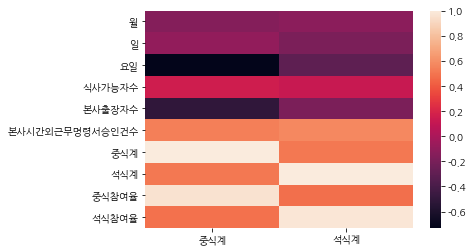

In [ ]:
sns.heatmap(train.corr()[['중식계', '석식계']]);


 - 중식

요일 <br>
본사시간외근무명령서승인건수<br>
본사출장자수<br>

 - 석식

본사시간외근무명령서승인건수<br>
요일<br>
본사출장자수<br>

In [ ]:
train.corr()[['중식참여율', '석식참여율']]

,중식참여율,석식참여율
월,-0.166198,-0.139499
일,-0.100648,-0.186355
요일,-0.697276,-0.284943
식사가능자수,-0.133553,-0.097914
본사출장자수,-0.618408,-0.267198
본사시간외근무명령서승인건수,0.473097,0.518348
중식계,0.957156,0.479768
석식계,0.475360,0.973722
중식참여율,1.000000,0.511255
석식참여율,0.511255,1.000000


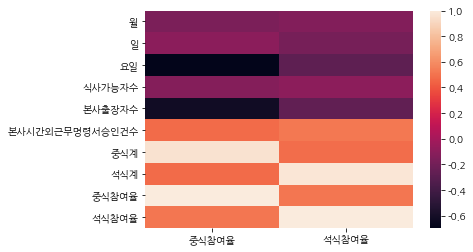

In [ ]:
sns.heatmap(train.corr()[['중식참여율', '석식참여율']]);

In [ ]:
train.corr()['중식참여율'].sort_values()

요일               -0.697276
본사출장자수           -0.618408
월                -0.166198
식사가능자수           -0.133553
일                -0.100648
본사시간외근무명령서승인건수    0.473097
석식계               0.475360
석식참여율             0.511255
중식계               0.957156
중식참여율             1.000000
Name: 중식참여율, dtype: float64

In [ ]:
train.corr()['석식참여율'].sort_values()

요일               -0.284943
본사출장자수           -0.267198
일                -0.186355
월                -0.139499
식사가능자수           -0.097914
중식계               0.479768
중식참여율             0.511255
본사시간외근무명령서승인건수    0.518348
석식계               0.973722
석식참여율             1.000000
Name: 석식참여율, dtype: float64

<h3> 라인그래프 </h3>

 - 요일
 - 월
 - 일


<AxesSubplot:xlabel='요일', ylabel='석식참여율'>

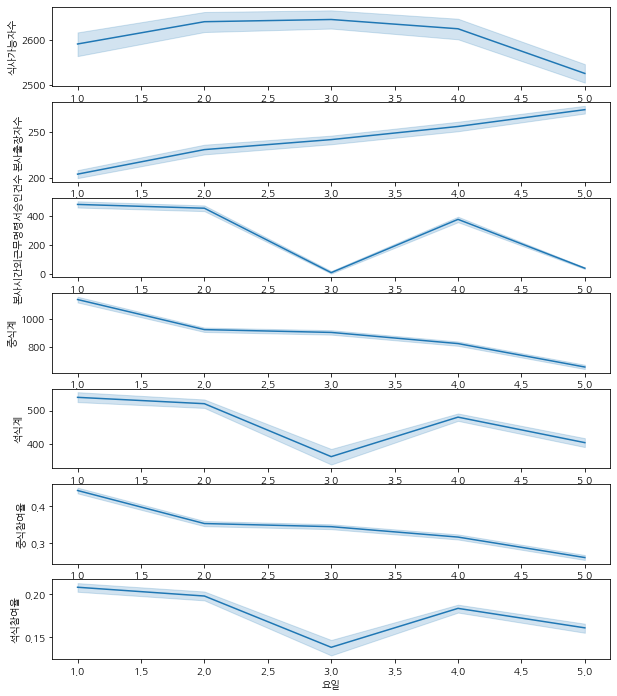

In [ ]:
fig, ax = plt.subplots(7)
fig.set_size_inches(10,12)

sns.lineplot(data=train, x='요일', y='식사가능자수', ax=ax[0])
sns.lineplot(data=train, x='요일', y='본사출장자수', ax=ax[1])
sns.lineplot(data=train, x='요일', y='본사시간외근무명령서승인건수', ax=ax[2])
sns.lineplot(data=train, x='요일', y='중식계', ax=ax[3])
sns.lineplot(data=train, x='요일', y='석식계', ax=ax[4])
sns.lineplot(data=train, x='요일', y='중식참여율', ax=ax[5])
sns.lineplot(data=train, x='요일', y='석식참여율', ax=ax[6])

요일별 데이터에서 <br>

 - 중식계는 본사출장자수와 반비례 관계, <br>
 - 석식계는 본사시간외근무명령서승인건수와 정비례 관계, <br>
로 밀접해 보임.


<h3> 2. 월 </h3>

<AxesSubplot:xlabel='월', ylabel='석식참여율'>

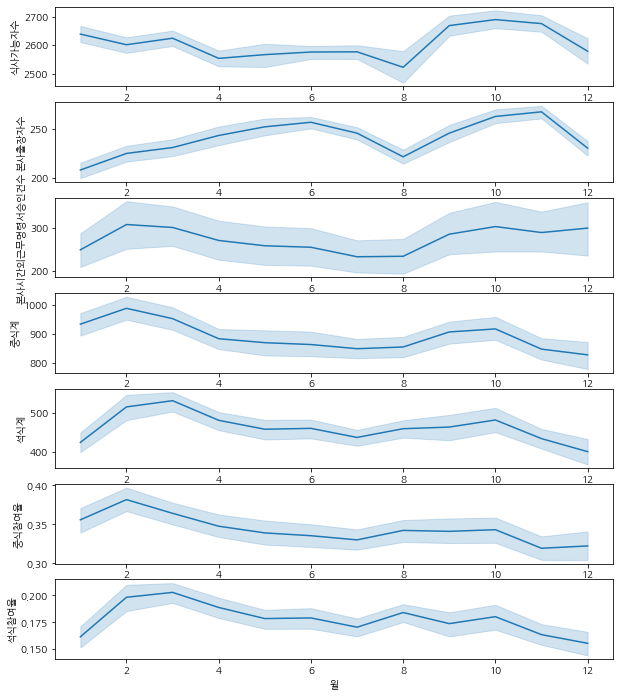

In [ ]:
fig, ax = plt.subplots(7)
fig.set_size_inches(10,12)

sns.lineplot(data=train, x='월', y='식사가능자수', ax=ax[0])
sns.lineplot(data=train, x='월', y='본사출장자수', ax=ax[1])
sns.lineplot(data=train, x='월', y='본사시간외근무명령서승인건수', ax=ax[2])
sns.lineplot(data=train, x='월', y='중식계', ax=ax[3])
sns.lineplot(data=train, x='월', y='석식계', ax=ax[4])
sns.lineplot(data=train, x='월', y='중식참여율', ax=ax[5])
sns.lineplot(data=train, x='월', y='석식참여율', ax=ax[6])

<AxesSubplot:xlabel='일', ylabel='석식참여율'>

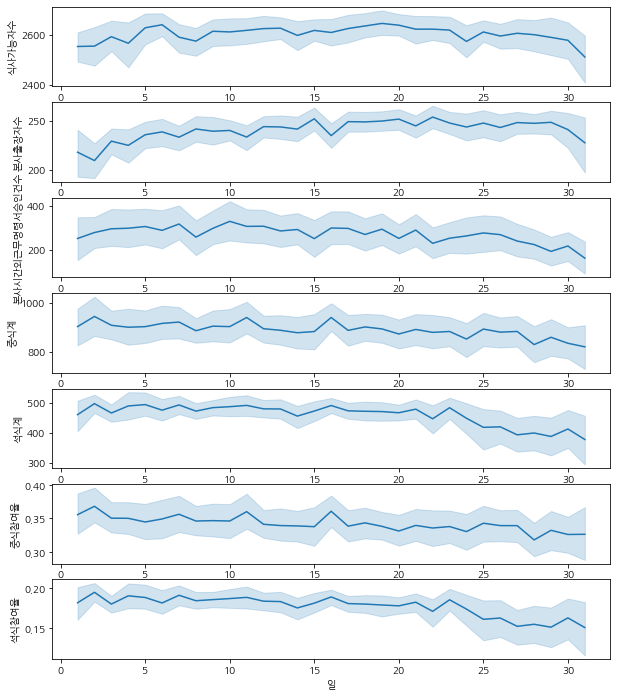

In [ ]:
fig, ax = plt.subplots(7)
fig.set_size_inches(10,12)

sns.lineplot(data=train, x='일', y='식사가능자수', ax=ax[0])
sns.lineplot(data=train, x='일', y='본사출장자수', ax=ax[1])
sns.lineplot(data=train, x='일', y='본사시간외근무명령서승인건수', ax=ax[2])
sns.lineplot(data=train, x='일', y='중식계', ax=ax[3])
sns.lineplot(data=train, x='일', y='석식계', ax=ax[4])
sns.lineplot(data=train, x='일', y='중식참여율', ax=ax[5])
sns.lineplot(data=train, x='일', y='석식참여율', ax=ax[6])

In [ ]:
# 요일을 석식 rank에 맞춰 mapping한 요일(석식) 칼럼 만들기.

weekday_rank4dinner = {
    1: 1,
    2: 2,
    3: 5,
    4: 3,
    5: 4,
}

train['요일(석식)'] = train['요일'].map(weekday_rank4dinner)
test['요일(석식)'] = test['요일'].map(weekday_rank4dinner)

In [ ]:
train.head()

,월,일,요일,식사가능자수,본사출장자수,본사시간외근무명령서승인건수,중식계,석식계,중식참여율,석식참여율,요일(석식)
0,2,1,1,2551.0,150,238,1039.0,331.0,0.407291,0.129753,1
1,2,2,2,2551.0,173,319,867.0,560.0,0.339867,0.219522,2
2,2,3,3,2545.0,180,111,1017.0,573.0,0.399607,0.225147,5
3,2,4,4,2497.0,220,355,978.0,525.0,0.391670,0.210252,3
4,2,5,5,2323.0,181,34,925.0,330.0,0.398192,0.142058,4


<h3> 베이스라인 모델 사용 </h3>

In [ ]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 대회 규칙
# 평가산식 : MAE(Mean Absolute Error)
lunch_model = RandomForestRegressor(criterion='mae')
dinner_model = RandomForestRegressor(criterion='mae')

<h3> 다른 모델 적용 </h3>

 - XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {
    'learning_rate': [0.0, 0.1, 0.09, 0.089, 0.08],
    'boosting_type': ['gbtree', 'gblinear', 'dart'],
    
}

lunch_r = XGBRegressor(objective='reg:squarederror')
dinner_r = XGBRegressor(objective='reg:squarederror')

lunch_model = GridSearchCV(lunch_r, params, scoring='neg_mean_absolute_error')
dinner_model = GridSearchCV(dinner_r, params, scoring='neg_mean_absolute_error')

In [ ]:
x = train[['월', '일', '요일', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수']]
y = train['중식계']

lunch_model.fit(x, y)
print(lunch_model.best_score_, lunch_model.best_params_)
lunch_model = lunch_model.best_estimator_

-86.02227778137967 {'boosting_type': 'gbtree', 'learning_rate': 0.09}


In [ ]:
test_x = test[['월', '일', '요일', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수']]
y_pred = lunch_model.predict(test_x)

In [ ]:
submit['중식계'] = y_pred

<h3> 석식 </h3>

In [ ]:
x = train[['월', '일', '요일(석식)', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수']]
y = train['석식계']

dinner_model.fit(x, y)
print(dinner_model.best_score_, dinner_model.best_params_)
dinner_model = dinner_model.best_estimator_

-74.9887862015562 {'boosting_type': 'gbtree', 'learning_rate': 0.089}


In [ ]:
test_x = test[['월', '일', '요일(석식)', '식사가능자수', '본사출장자수', '본사시간외근무명령서승인건수']]
y_pred = dinner_model.predict(test_x)

In [ ]:
submit['석식계'] = y_pred

<h3> 파일저장 </h3>

In [ ]:
submit.to_csv('submit.csv', index=False)

from google.colab import files

files.download('submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>